In [1]:
%matplotlib inline
import mahotas as mh
import numpy as np
import matplotlib.pyplot as plt
import Lib_eSpectrometer as es

(1.0423283577764602, 0.0034030243748241823)


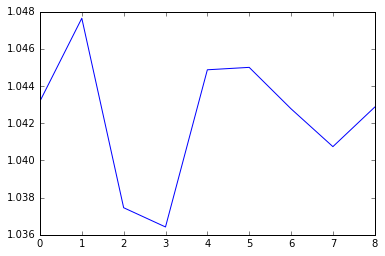

In [2]:
basepath = "O:\Electrons\Programs\CLS_Calibration\OLD\\"
screen = "CAWO_B"
date = "20170323"
GTLS = "s1"
N = 9
factor = np.ones((N,1))
firstshot = 3
for shot in range(firstshot, firstshot + N):
    (a,b,c) = es.get_CalibrationFactor(basepath, date, GTLS, shot, screen, False)
    factor[shot-firstshot]=a
plt.plot(factor)
Const = np.average(factor)
Std = np.std(factor)
print(Const, Std)

[ 69.45400595]


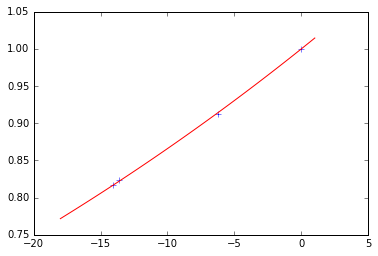

In [3]:
from scipy.optimize import curve_fit
from Lib_eSpectrometer import get_Age as gA

x = [gA(20160122), gA(20160204), gA(20160916), gA(20170323)]
y = [1.032/1.264, 1.160/1.409, 1.286/1.409, 1.409/1.409]


def line(x, t):
    from numpy import exp
    return exp(x/t)
    
(popt, pcov) = curve_fit(line, x, y)

print popt
xfine = np.linspace(-18., 1., 100)
plt.plot(x,y,"+")
plt.plot(xfine, line(xfine, popt[0]), "-r")
plt.show()